# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct statistical tests on a real-world dataset

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [6]:
#Your code here
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
def welch_t(a, b):
    
    """ Calculate Welch's t statistic for two samples. """

    numerator = a.mean() - b.mean()
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return np.abs(numerator/denominator)


def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = a.size
    n2 = b.size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator


def p_value(a, b, two_sided=False):
    
    """ Calculate the p value of the samples"""

    t = welch_t(a, b)
    df = welch_df(a, b)
    
    p = 1-stats.t.cdf(np.abs(t), df)
    
    if two_sided:
        return 2*p
    else:
        return p

In [2]:
Response_df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')
schema = pd.read_csv('schema.csv', encoding='latin1')

/opt/conda/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, resul

In [3]:
Response_df

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,250000.000
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important,NaN,NaN
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802310,64184.800
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017402,20882.400


In [45]:
Response_df.FormalEducation

0                                        Bachelor's degree
1                                          Master's degree
2                                          Master's degree
3                                          Master's degree
4                                          Doctoral degree
5                                          Doctoral degree
6                                          Master's degree
7                                        Bachelor's degree
8                                        Bachelor's degree
9                                        Bachelor's degree
10                                       Bachelor's degree
11                                       Bachelor's degree
12                                         Doctoral degree
13                                                     NaN
14                                         Master's degree
15                                         Master's degree
16                                                     N

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

In [87]:
#Your code here
degree_salaries = Response_df[['FormalEducation', 'AdjustedCompensation']]
master_df = degree_salaries[degree_salaries['FormalEducation'] == "Master's degree"]
bachelor_df = degree_salaries[degree_salaries['FormalEducation'] == "Bachelor's degree"]
doctoral_df = degree_salaries[degree_salaries['FormalEducation'] == "Doctoral degree"]

In [88]:
# master_df.drop(master_df['AdjustedCompensation']==0, axis=0)
master_df = master_df.replace(0, np.nan)
master_df = master_df.dropna(how='all', axis=0)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


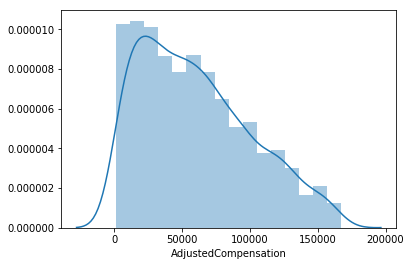

In [89]:
master_df.dropna(inplace=True)
master_df= master_df[master_df['AdjustedCompensation'] != 0]
master_salary = master_df['AdjustedCompensation']
master_salary = master_salary.sort_values()
# master_salary_slices = master_salary[int(len(master_salary) * .05) : int(len(master_salary) * .95)]
sns.distplot(master_salary_slices)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


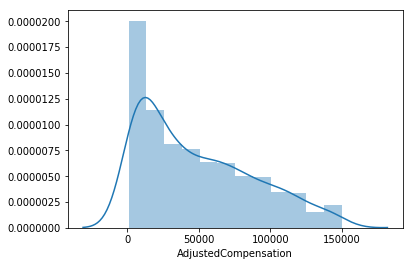

In [90]:
bachelor_df.dropna(inplace=True)
bachelor_df= bachelor_df[bachelor_df['AdjustedCompensation'] != 0]
bachelor_salary = bachelor_df['AdjustedCompensation']
bachelor_salary = bachelor_salary.sort_values()
# bachelor_salary_slices = bachelor_salary[int(len(bachelor_salary) * .05) : int(len(bachelor_salary) * .95)]
sns.distplot(bachelor_salary_slices)

In [103]:
result1 = p_value(bachelor_salary_slices, master_salary_slices, two_sided=True)
print(result1)

1.6113776979409522e-12


**According to my results so far, they are probably different**

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


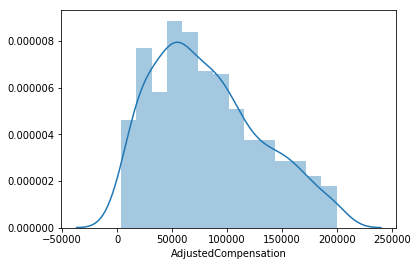

In [146]:
doctoral_df.dropna(inplace=True)
doctoral_df= doctoral_df[doctoral_df['AdjustedCompensation'] >= 0]
doctoral_salary = doctoral_df['AdjustedCompensation']
doctoral_salary = doctoral_salary.sort_values()
# doctoral_salary_slices = doctoral_salary[int(len(doctoral_salary) * .05) : int(len(doctoral_salary) * .95)]
sns.distplot(doctoral_salary_slices)

In [104]:
result2 = p_value(bachelor_salary_slices, doctoral_salary_slices, two_sided=True)
print(result2)

0.0


**According to my results so far, they are probably different**

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [117]:
degree_salaries.dropna(inplace=True)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [121]:
degree_salaries = degree_salaries[degree_salaries['AdjustedCompensation']>0]

In [122]:
degree_salaries['AdjustedCompensation'].min()

0.06

In [124]:
degree_salaries.AdjustedCompensation.unique()

array([2.50000e+05, 6.41848e+04, 2.08824e+04, ..., 3.18780e+04,
       3.33600e+03, 1.00000e+00])

In [120]:
degree_salaries.min()

FormalEducation         Bachelor's degree
AdjustedCompensation             -73.5163
dtype: object

In [129]:
np.exp(10)

22026.465794806718

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


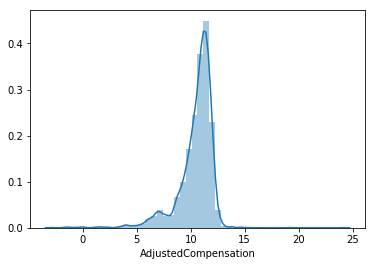

In [123]:
sns.distplot(np.log(degree_salaries.AdjustedCompensation))

In [134]:
degree_list = list(degree_salaries.FormalEducation.unique())

In [138]:
# doctoral_salary.dropna(inplace=True)

In [143]:
doctoral_salary.unique()

array([False,  True])

In [145]:
doctoral_salar = doctoral_salary(doctoral_salary>0)

TypeError: 'Series' object is not callable

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


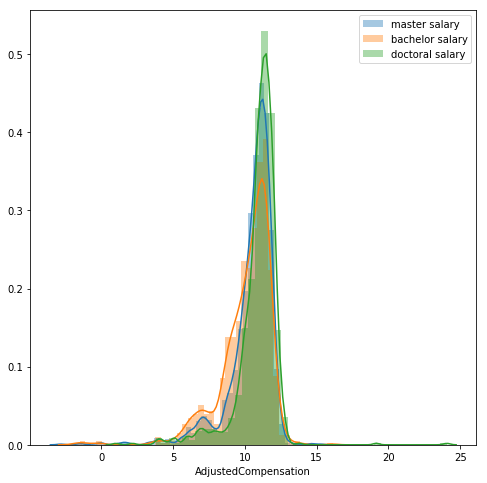

In [148]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.distplot(np.log(master_salary), label='master salary')
ax = sns.distplot(np.log(bachelor_salary), label='bachelor salary')
ax = sns.distplot(np.log(doctoral_salary), label='doctoral salary')
plt.legend()

In [109]:
#Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, degree_salaries).fit()
table = sm.stats.anova_lm(lm, typ=2)

In [110]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     AdjustedCompensation   R-squared:                       0.001
Model:                              OLS   Adj. R-squared:                 -0.001
Method:                   Least Squares   F-statistic:                    0.5907
Date:                  Wed, 26 Jun 2019   Prob (F-statistic):              0.738
Time:                          00:27:57   Log-Likelihood:                -92469.
No. Observations:                  4342   AIC:                         1.850e+05
Df Residuals:                      4335   BIC:                         1.850e+05
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                6.489e+04   1.29e+07      0.005      0.996   -2.52e+07    2.54e+07
C(FormalEducation)[T.Doctoral degree]                                                     2.95e+07   1.89e+07      1.560      0.119   -7.57e+06    6.66e+07
C(FormalEducation)[T.I did not complete any formal education past high school]          -5569.3307   7.95e+07  -7.01e-05      1.000   -1.56e+08    1.56e+08
C(FormalEducation)[T.I prefer not to answer]                                              1.58e+05   1.63e+08      0.001      0.999   -3.19e+08    3.19e+08
C(FormalEducation)[T.Master's degree]                                                    4252.8019   1.61e+07      0.000      1.000   -3.16e+07    3.16e+07
C(FormalEducation)[T.Professional degree]                                               -3680.3952   3.98e+07  -9.24e-05      1.000   -7.81e+07    7.81e+07
C(FormalEducation)[T.Some college/university study without earning a bachelor's degree]  1.803e+04   4.28e+07      0.000      1.000   -8.38e+07    8.39e+07
==============================================================================
Omnibus:                    15119.552   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3394415916.389
Skew:                          65.786   Prob(JB):                         0.00
Kurtosis:                    4332.550   Cond. No.                         28.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!